<a href="https://colab.research.google.com/github/Elsacred02/assignment_1_advanced_machine_learning/blob/main/advanced_machine_learning_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import kagglehub
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
!pip install keras-tuner --quiet
import keras_tuner as kt
from time import time
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import class_weight

In [24]:
# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")
csv_file_path = os.path.join(path, "UCI_Credit_Card.csv")

original_df = pd.read_csv(csv_file_path)
original_df

Using Colab cache for faster access to the 'default-of-credit-card-clients-dataset' dataset.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [25]:
# Elimino se presenti i valori nulli e la colonna relativa all'id (come id utilizzo quello del data-frame)
clean_df = original_df.dropna().reset_index(drop=True)
clean_df = clean_df.drop(columns=["ID"])
clean_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [26]:
# Converto la variabile relativa al sesso in valori 0 = maschio, 1 = femmina
clean_df['SEX'] = clean_df['SEX'].map({1: 0, 2: 1})
clean_df.rename(columns={'SEX': 'IS_FEMALE'}, inplace=True)
clean_df

,LIMIT_BAL,IS_FEMALE,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,1,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,1,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,1,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,1,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,0,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,0,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,0,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,0,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [27]:
# Elimino i valori meno probabili dalla colonna education ed applico one hot encoding
clean_df['EDUCATION'] = clean_df['EDUCATION'].replace({5: 4, 6: 4})
clean_df = pd.get_dummies(clean_df, columns=['EDUCATION'], prefix='EDU').astype(int)
clean_df

,LIMIT_BAL,IS_FEMALE,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4
0,20000,1,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,1,0,0
1,120000,1,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,0,1,0,0
2,90000,1,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,0,0,1,0,0
3,50000,1,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,0,0,1,0,0
4,50000,0,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,1,39,0,0,0,0,0,0,...,5003,3047,5000,1000,0,0,0,0,1,0
29996,150000,0,2,43,-1,-1,-1,-1,0,0,...,8998,129,0,0,0,0,0,0,1,0
29997,30000,0,2,37,4,3,2,-1,0,0,...,22000,4200,2000,3100,1,0,0,1,0,0
29998,80000,0,1,41,1,-1,0,0,0,-1,...,1178,1926,52964,1804,1,0,0,0,1,0


In [28]:
# Faccio la stessa cosa per la feature marriage
clean_df = pd.get_dummies(clean_df, columns=['MARRIAGE'], prefix='MARRIAGE').astype(int)
clean_df

,LIMIT_BAL,IS_FEMALE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default.payment.next.month,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,1,0,0,1,0,0,0,1,0,0
1,120000,1,26,-1,2,0,0,0,2,2682,...,1,0,0,1,0,0,0,0,1,0
2,90000,1,34,0,0,0,0,0,0,29239,...,0,0,0,1,0,0,0,0,1,0
3,50000,1,37,0,0,0,0,0,0,46990,...,0,0,0,1,0,0,0,1,0,0
4,50000,0,57,-1,0,-1,0,0,0,8617,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,39,0,0,0,0,0,0,188948,...,0,0,0,0,1,0,0,1,0,0
29996,150000,0,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,0,1,0,0,0,1,0
29997,30000,0,37,4,3,2,-1,0,0,3565,...,1,0,0,1,0,0,0,0,1,0
29998,80000,0,41,1,-1,0,0,0,-1,-1645,...,1,0,0,0,1,0,0,1,0,0


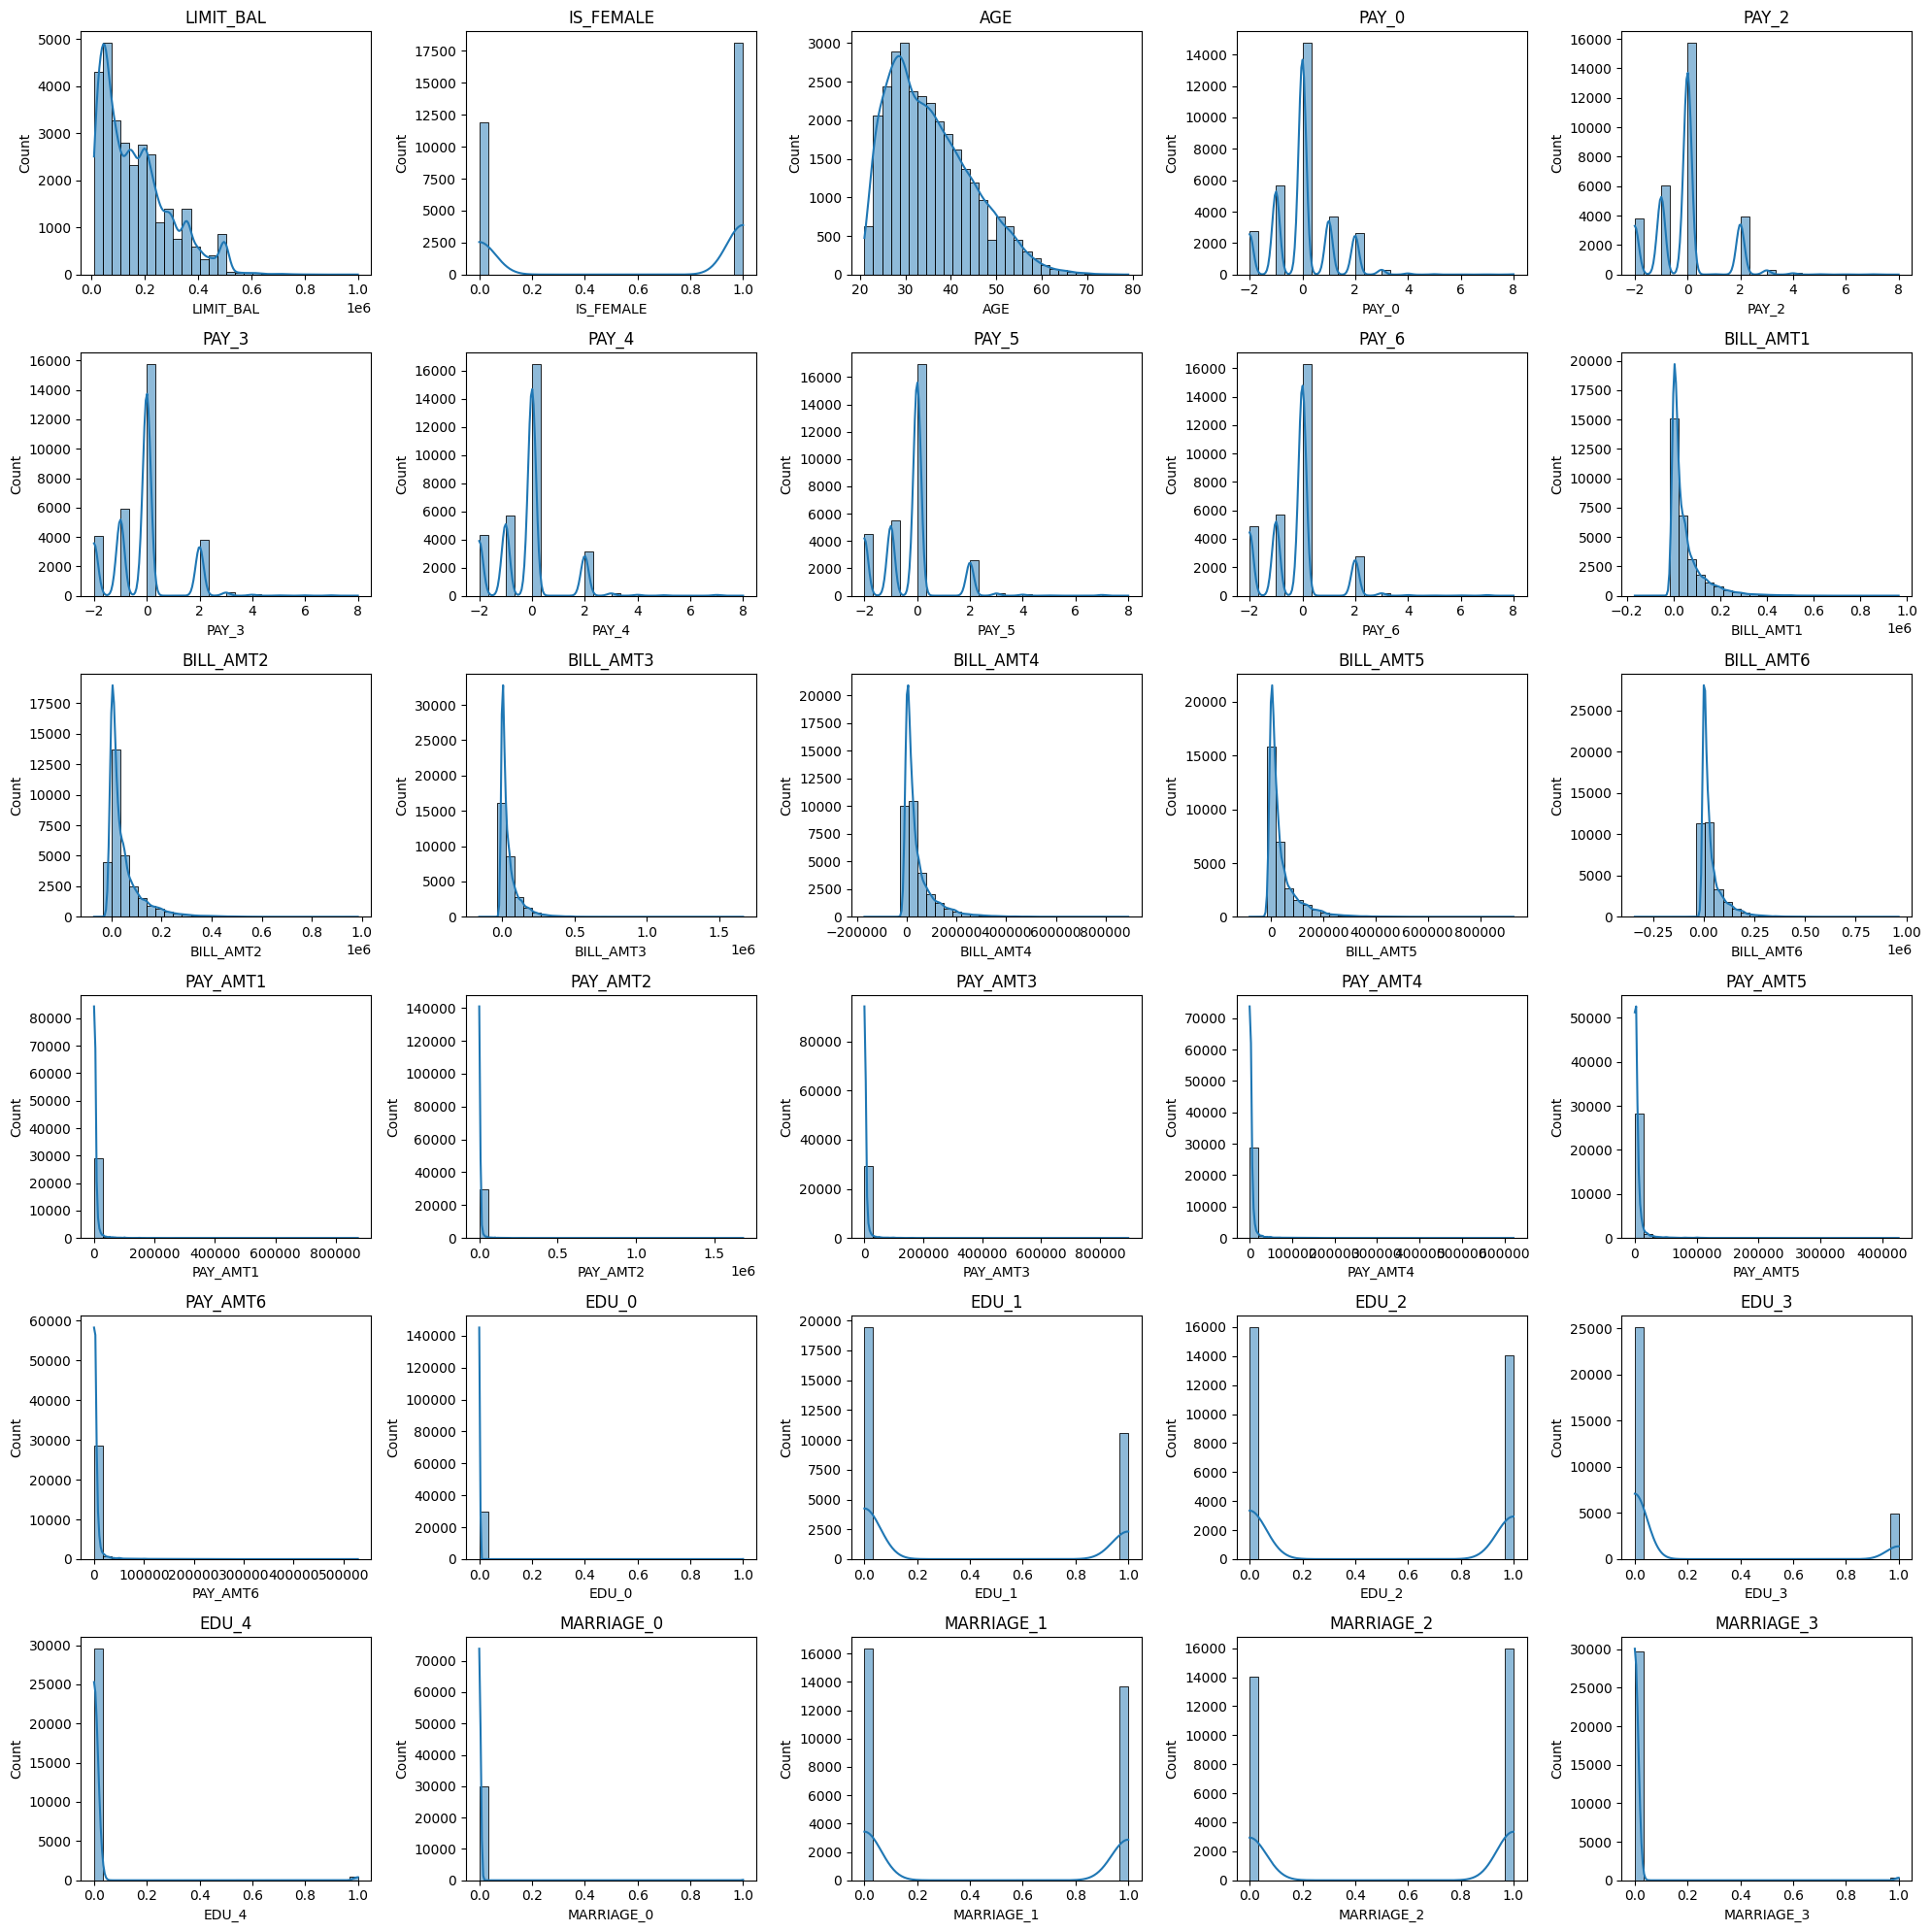

In [29]:
# Separo le istanze dalla variabile target e visualizzo la loro distribuzione

target = clean_df["default.payment.next.month"]
instances = clean_df.drop(columns=["default.payment.next.month"])

num_cols = instances.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(instances[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [30]:
# Stampo a schermo le statistiche descrittive del data set
instances.describe()

,LIMIT_BAL,IS_FEMALE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.603733,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,5215.502567,0.000467,0.352833,0.467667,0.163900,0.015133,0.001800,0.455300,0.532133,0.010767
std,129747.661567,0.489129,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,17777.465775,0.021598,0.477859,0.498962,0.370191,0.122085,0.042389,0.498006,0.498975,0.103204
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,4000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,1.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


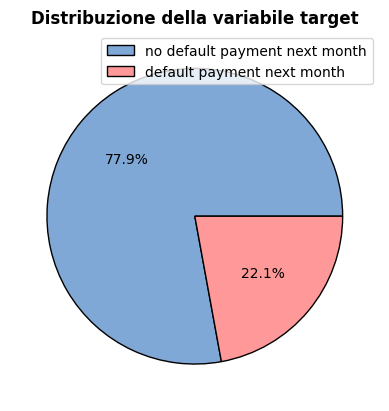

In [31]:
colors = ["#7FA8D6", "#FF9999"]
wedges, _, _ = plt.pie(
    target.value_counts(),
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    autopct='%1.1f%%'
)
plt.legend(wedges, ["no default payment next month", "default payment next month"], loc="upper right")
plt.title("Distribuzione della variabile target", fontweight="bold")

plt.show()

In [32]:
# Effettuo la standardizzazione dei dati per applicare la PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(instances)
scaled_data

array([[-1.13672015,  0.81016074, -1.24601985, ...,  1.09377971,
        -1.06647132, -0.10432569],
       [-0.3659805 ,  0.81016074, -1.02904717, ..., -0.91426088,
         0.93767172, -0.10432569],
       [-0.59720239,  0.81016074, -0.16115646, ..., -0.91426088,
         0.93767172, -0.10432569],
       ...,
       [-1.05964618, -1.23432296,  0.16430256, ..., -0.91426088,
         0.93767172, -0.10432569],
       [-0.67427636, -1.23432296,  0.59824792, ...,  1.09377971,
        -1.06647132, -0.10432569],
       [-0.90549825, -1.23432296,  1.14067961, ...,  1.09377971,
        -1.06647132, -0.10432569]])

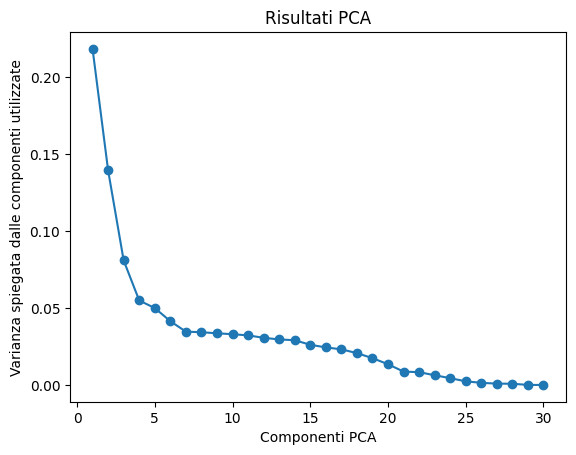

In [33]:
# Applicazione della PCA
pca = PCA().fit(scaled_data)

# Grafico risultati della pca
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti PCA')
plt.ylabel('Varianza spiegata dalle componenti utilizzate')
plt.title("Risultati PCA")
plt.show()

In [34]:
# Selezionando 19 componenti si speiga il 95% della varianza complessiva dei dati

pca_components_number = 19
pca = PCA(pca_components_number).fit(scaled_data)
pca_data = pca.transform(scaled_data)
sum(pca.explained_variance_ratio_)

np.float64(0.9535941289533266)

In [35]:
# Creo un data frame con i componenti della PCA

pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(pca_components_number)])
pca_df["default.payment.next.month"] = target
instances_pca = pca_df.drop('default.payment.next.month', axis=1)

# Suddivido i dati in training, validation e test (divisione 60-20-20)
X_train_validation, X_test, y_train_validation, y_test = train_test_split(instances_pca, target, test_size=0.2, random_state=42, stratify=target)

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_validation, y_train_validation, test_size=0.25, random_state=42, stratify=y_train_validation
)

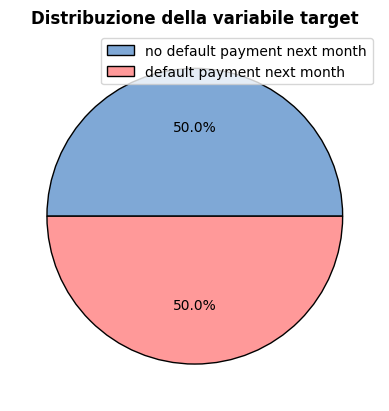

In [36]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#rus = RandomUnderSampler(random_state=42)
#X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

colors = ["#7FA8D6", "#FF9999"]
wedges, _, _ = plt.pie(
    y_train_res.value_counts(),
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    autopct='%1.1f%%'
)
plt.legend(wedges, ["no default payment next month", "default payment next month"], loc="upper right")
plt.title("Distribuzione della variabile target", fontweight="bold")

plt.show()

In [37]:
def build_nn_model(hp):
    model = keras.Sequential()

    # Input Layer (dimensione delle feature del dataset)
    model.add(keras.layers.Input(shape=(X_train_res.shape[1],)))

    # Numero di hidden layers scelto dinamicamente tra 1 e 3
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=32, max_value=128, step=32),
            activation=hp.Choice("activation", ["relu", "tanh"])
        ))
        model.add(keras.layers.Dropout(hp.Float(f"dropout_{i}", 0.1, 0.4, step=0.1)))

    # Output Layer (una sola uscita con attivazione sigmoide per classificazione binaria)
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Ottimizzatore con learning rate variabile
    optimizer = keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", [1e-3, 5e-4, 1e-4]))

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [38]:
# Calcolo dei pesi della classe
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print(class_weights)

# Creiamo il tuner
nn_tuner = kt.RandomSearch(
    build_nn_model,
    objective="accuracy",  # Ottimizziamo la accuracy sul validation set
    max_trials=10,  # Numero massimo di combinazioni di iperparametri da testare
    executions_per_trial=3,  # Numero di volte che ogni modello viene eseguito (per ridurre variazioni casuali)
    directory="nn_tuner_results",  # Cartella in cui salvare i risultati
    project_name="assignment1_nn_model_tuning",  # Nome del progetto
    overwrite=True # Da togliere una volta definiti i set di addestramento
)

nn_tuner.search(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=10,
    batch_size=128,
    verbose=2,
    class_weight=class_weights
)

Trial 10 Complete [00h 00m 30s]
accuracy: 0.6865000128746033

Best accuracy So Far: 0.7599629561106364
Total elapsed time: 00h 05m 06s


In [39]:
nn_best_hps = nn_tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"\tMigliori iperparametri trovati\n")
print(f"Numero di layer nascosti: {nn_best_hps.get('num_layers')}\n")

for i in range(nn_best_hps.get("num_layers")):
  print(f"Informazioni relative al layer nascosto {i+1}:")
  print(f"- Numero di neuroni: {nn_best_hps.get(f'units_{i}')}")
  print(f"- Funzione di attivazione: {nn_best_hps.get('activation')}")
  print(f"- Dropout: {nn_best_hps.get(f'dropout_{i}'):.1f}")
print(f"\nLearning rate: {nn_best_hps.get('learning_rate')}")

	Migliori iperparametri trovati

Numero di layer nascosti: 2

Informazioni relative al layer nascosto 1:
- Numero di neuroni: 32
- Funzione di attivazione: relu
- Dropout: 0.2
Informazioni relative al layer nascosto 2:
- Numero di neuroni: 32
- Funzione di attivazione: relu
- Dropout: 0.1

Learning rate: 0.0005


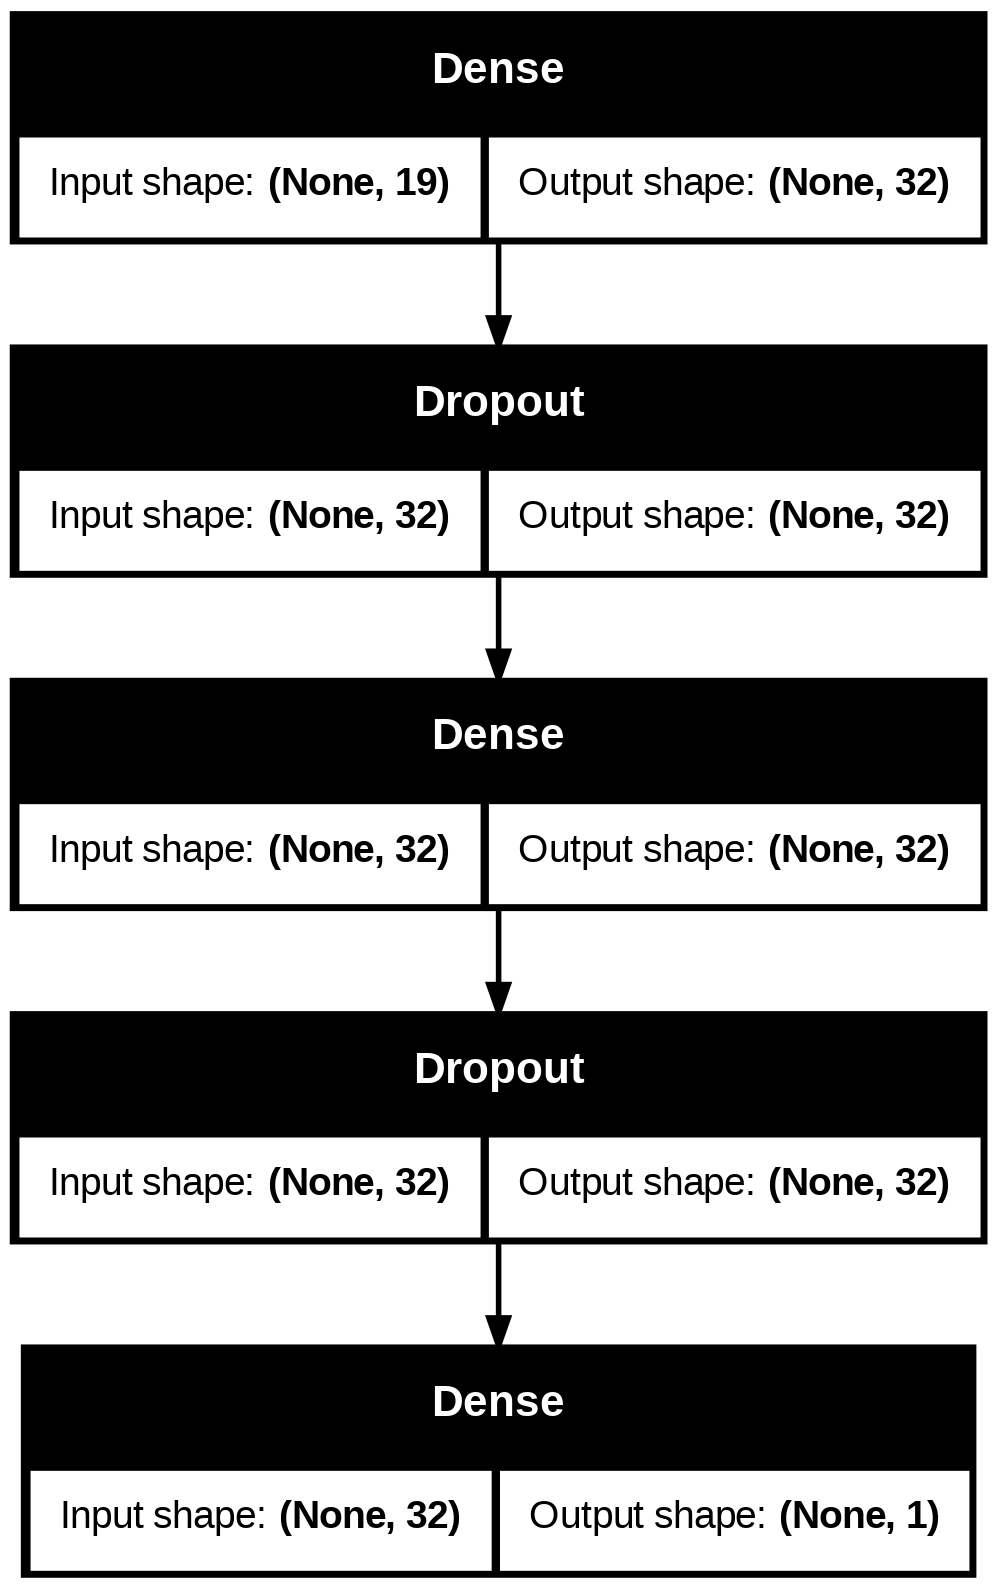

In [40]:
nn_best_model = build_nn_model(nn_best_hps)
keras.utils.plot_model(nn_best_model, show_shapes=True)

In [41]:
# Addestramento del modello
star_time_nn = time()
neural_network_history = nn_best_model.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=30,
    batch_size=128,
    verbose=1,
    class_weight=class_weights
)
# numero di epoche = numero di iterazioni
# batch_size = 32 significa che calcola il gradiente su 32 elementi del training set
end_time_nn = time()
training_time_nn = end_time_nn - star_time_nn
print(f"\nTempo di addestramento: {training_time_nn: .2f} secondi")

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5534 - loss: 0.6627 - val_accuracy: 0.6768 - val_loss: 0.6332
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6629 - loss: 0.6303 - val_accuracy: 0.7197 - val_loss: 0.6223
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.6234 - val_accuracy: 0.7600 - val_loss: 0.6167
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7318 - loss: 0.6055 - val_accuracy: 0.7845 - val_loss: 0.6026
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.5972 - val_accuracy: 0.7878 - val_loss: 0.5976
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7534 - loss: 0.6088 - val_accuracy: 0.7880 - val_loss: 0.5939
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7538 - loss: 0.6032 - val_accuracy: 0.7852 - val_loss: 0.5955
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7617 - loss: 0.5963 - val_accuracy: 0

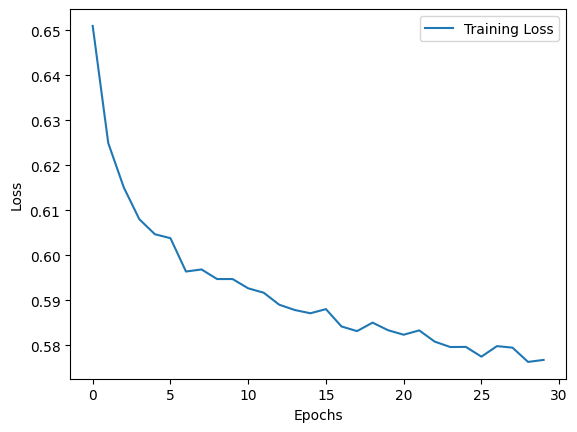

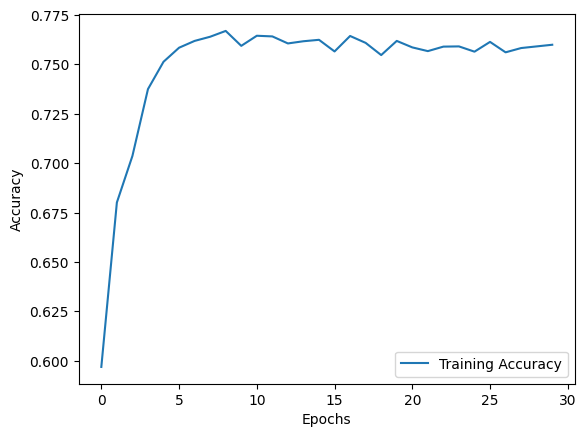

In [42]:
history_dict = neural_network_history.history

# Plot della loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot dell'accuracy
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
test_loss, test_acc = nn_best_model.evaluate(X_test, y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7483 - loss: 0.5789


In [44]:
y_pred_neural_network = nn_best_model.predict(X_test)
y_pred_classes_nn = (y_pred_neural_network > 0.5).astype(int)

classification_report_nn = classification_report(y_test, y_pred_classes_nn)
print(f"\nTest Accuracy: {test_acc:.10f}")
print("Classification report: \n", classification_report_nn)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Test Accuracy: 0.7544999719
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      4673
           1       0.46      0.58      0.51      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000

